In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ds/dhoni/Dhoni2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haar-cascade-files-master/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haar-cascade-files-master/haarcascade_eye.xml')

In [ ]:
def getCroppedFaceImage(image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,1.3,5)
  
  if len(faces) == 0:
    return None
  else:
    faces_list = []
    for face in faces:
      for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        faces_list.append(roi_color)
      return faces_list

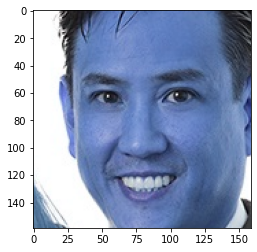

In [ ]:
cropped = getCroppedFaceImage('/content/drive/MyDrive/Colab Notebooks/ds/dhoni/Dhoni5.jpg')
plt.imshow(cropped[2])

In [ ]:
path_to_data = "/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/"
path_to_cr_data = "/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/shy',
 '/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/fear',
 '/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/puzzled',
 '/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/confused',
 '/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/scared',
 '/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/happy',
 '/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/angry',
 '/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/crying',
 '/content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/sad']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = getCroppedFaceImage(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            for f in roi_color:
              cropped_file_name = celebrity_name + str(count) + ".jpg"
              cropped_file_path = cropped_folder + "/" + cropped_file_name 
              cv2.imwrite(cropped_file_path, f)
              celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
              count += 1  

shy
Generating cropped images in folder:  /content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/cropped/shy
fear
Generating cropped images in folder:  /content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/cropped/fear
puzzled
Generating cropped images in folder:  /content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/cropped/puzzled
confused
Generating cropped images in folder:  /content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/cropped/confused
scared
Generating cropped images in folder:  /content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/cropped/scared
happy
Generating cropped images in folder:  /content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/cropped/happy
angry
Generating cropped images in folder:  /content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/cropped/angry
crying
Generating cropped images in folder:  /content/drive/MyDrive/Colab Notebooks/emotions_dataset_v0.1/cropped/crying
sad
Generating cropped images in folder: